<a href="https://colab.research.google.com/github/FlavioIBmec/Case-MMZR/blob/main/Case_MMZR_Q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df_local = pd.read_excel('https://raw.githubusercontent.com/FlavioIBmec/Case-MMZR/main/retornos_dados_locais.xlsx')

# --- Limpeza de df_local ---
# Remove as duas primeiras linhas do DataFrame, que contêm informações de cabeçalho redundantes
df_local = df_local.iloc[2:]
# Renomeia as colunas do DataFrame para nomes mais descritivos e padronizados
df_local = df_local.rename(columns={
'Unnamed: 0':'data',
'Pós-Fixado':'CDI Pós-Fixado',
'Alternativos':'Alternativos - Dólar',
'RV Local':'RV Local - Ibovespa',
'Pré-Fixado':'Pré-Fixado - IDkA Pré 3 Anos',
'Imobiliário':'Imobiliário - IFIX',
'Retorno Absoluto':'Retorno Absoluto - IHFA',
'Inflação Tipo 1':'Inflação IMA-B',
'Inflação Tipo 2':'Inflação IMA-B 5',
'Inflação Tipo 3':'Inflação IMA-B 5+'
})

df_local['data'] = pd.to_datetime(df_local['data'])
df_local.head()

,data,CDI Pós-Fixado,Alternativos - Dólar,RV Local - Ibovespa,Pré-Fixado - IDkA Pré 3 Anos,Imobiliário - IFIX,Retorno Absoluto - IHFA,Inflação IMA-B,Inflação IMA-B 5,Inflação IMA-B 5+
2,2015-01-02,0.000435,0.013817,-0.029896,0.001178,0.007331,0.002169,0.000884,0.000801,0.00093
3,2015-01-05,0.000435,0.00661,-0.020531,0.00225,0.004656,0.000445,0.002688,0.001732,0.003221
4,2015-01-06,0.000435,-0.003099,0.010186,0.005614,-0.003962,-0.002435,0.008345,0.002112,0.011818
5,2015-01-07,0.000435,-0.007993,0.030458,-0.000729,0.002649,0.001135,-0.001261,0.000457,-0.002209
6,2015-01-08,0.000435,0.004178,0.009725,0.000273,0.001073,0.001478,0.001211,0.000698,0.001495


In [3]:
cnpj_fundo = "36.671.748/0001-63" # CNPJ do fundo ALLOCATION RETORNO ABSOLUTO FIC FIM
inicio = "2021-01" # Define o mês de início para a coleta de dados do fundo, levando em conta que o fundo 'nasceu' em 04-01-2021
fim = "2026-02" # Define o mês de fim para a coleta de dados do fundo

# Cria um intervalo de períodos mensais para iterar e baixar os dados
periodos = pd.period_range(inicio, fim, freq = "M")

dfs = [] # Lista para armazenar os DataFrames de cada mês

for p in periodos:
    # Constrói a URL para baixar o arquivo ZIP de informações diárias do fundo da CVM
    url = ("https://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/"f"inf_diario_fi_{p.year}{p.month:02d}.zip")

    try:
        print(f"Lendo {p.year}-{p.month:02d}...") # Imprime o mês que está sendo lido
        # Lê o arquivo CSV dentro do ZIP, especificando o separador e a codificação
        temp = pd.read_csv(url,sep=';',encoding='latin1',low_memory=False)

        # Verifica qual coluna contém o CNPJ do fundo (pode variar entre 'CNPJ_FUNDO' ou 'CNPJ_FUNDO_CLASSE')
        if 'CNPJ_FUNDO' in temp.columns:
            col_cnpj = 'CNPJ_FUNDO'
        elif 'CNPJ_FUNDO_CLASSE' in temp.columns:
            col_cnpj = 'CNPJ_FUNDO_CLASSE'
        else:
            # Se a coluna de CNPJ não for encontrada, levanta um erro
            raise ValueError("Coluna de CNPJ não encontrada")

        # Filtra o DataFrame para incluir apenas os registros do fundo desejado
        temp = temp[temp[col_cnpj] == cnpj_fundo]

        # Se o DataFrame filtrado não estiver vazio, adiciona-o à lista de DataFrames
        if not temp.empty:
            dfs.append(temp)

    except Exception as e:
        # Em caso de erro durante o download ou processamento, imprime uma mensagem de erro
        print(f"Erro em {p.year}-{p.month:02d}: {e}")


# Concatena todos os DataFrames da lista 'dfs' em um único DataFrame 'df_fundo'
df_fundo = pd.concat(dfs, ignore_index=True)
# Converte a coluna 'DT_COMPTC' para o formato datetime
df_fundo['DT_COMPTC'] = pd.to_datetime(df_fundo['DT_COMPTC'])
# Ordena o DataFrame pelas datas da coluna 'DT_COMPTC'
df_fundo = df_fundo.sort_values('DT_COMPTC')

Lendo 2021-01...
Lendo 2021-02...
Lendo 2021-03...
Lendo 2021-04...
Lendo 2021-05...
Lendo 2021-06...
Lendo 2021-07...
Lendo 2021-08...
Lendo 2021-09...
Lendo 2021-10...
Lendo 2021-11...
Lendo 2021-12...
Lendo 2022-01...
Lendo 2022-02...
Lendo 2022-03...
Lendo 2022-04...
Lendo 2022-05...
Lendo 2022-06...
Lendo 2022-07...
Lendo 2022-08...
Lendo 2022-09...
Lendo 2022-10...
Lendo 2022-11...
Lendo 2022-12...
Lendo 2023-01...
Lendo 2023-02...
Lendo 2023-03...
Lendo 2023-04...
Lendo 2023-05...
Lendo 2023-06...
Lendo 2023-07...
Lendo 2023-08...
Lendo 2023-09...
Lendo 2023-10...
Lendo 2023-11...
Lendo 2023-12...
Lendo 2024-01...
Lendo 2024-02...
Lendo 2024-03...
Lendo 2024-04...
Lendo 2024-05...
Lendo 2024-06...
Lendo 2024-07...
Lendo 2024-08...
Lendo 2024-09...
Lendo 2024-10...
Lendo 2024-11...
Lendo 2024-12...
Lendo 2025-01...
Lendo 2025-02...
Lendo 2025-03...
Lendo 2025-04...
Lendo 2025-05...
Lendo 2025-06...
Lendo 2025-07...
Lendo 2025-08...
Lendo 2025-09...
Lendo 2025-10...
Lendo 2025-11.

In [4]:
# Seleciona apenas as colunas 'DT_COMPTC' e 'VL_QUOTA'
df_fundo = df_fundo[['DT_COMPTC', 'VL_QUOTA']]
# Renomeia a coluna 'DT_COMPTC' para 'data'
df_fundo = df_fundo.rename(columns={'DT_COMPTC': 'data'})
df_fundo.head()

,data,VL_QUOTA
0,2021-01-04,1.000000
1,2021-01-05,1.000041
2,2021-01-06,1.000087
3,2021-01-07,1.000134
4,2021-01-08,1.000176


In [5]:
# df_fundo começa em 04-01-2021 e df_local termina em 31-12-2025
df = pd.merge(df_fundo, df_local, on='data', how='inner')
df.head()

,data,VL_QUOTA,CDI Pós-Fixado,Alternativos - Dólar,RV Local - Ibovespa,Pré-Fixado - IDkA Pré 3 Anos,Imobiliário - IFIX,Retorno Absoluto - IHFA,Inflação IMA-B,Inflação IMA-B 5,Inflação IMA-B 5+
0,2021-01-04,1.000000,0.000075,-0.006562,-0.001366,0.000302,-0.000934,-0.001046,0.000428,0.000516,0.000351
1,2021-01-05,1.000041,0.000075,0.031825,0.004388,-0.003088,0.000021,0.001618,-0.001672,0.000065,-0.003189
2,2021-01-06,1.000087,0.000075,-0.001633,-0.002313,-0.003971,0.000771,-0.003938,-0.002936,0.000068,-0.005567
3,2021-01-07,1.000134,0.000075,0.00472,0.027589,-0.006362,-0.002171,0.003505,-0.005073,-0.001637,-0.0081
4,2021-01-08,1.000176,0.000075,0.004679,0.021985,-0.002811,0.001358,0.005985,0.000108,-0.00033,0.000497


In [6]:
# Calcula os retornos logarítmicos diários da coluna 'VL_QUOTA' e os armazena em uma nova coluna 'Cotas'.
df['Cotas'] = np.log(df['VL_QUOTA']).diff()
# Preenche quaisquer valores NaN (Not a Number) na coluna 'Cotas' com 0.
df['Cotas'] = df['Cotas'].fillna(0)
df.head()

,data,VL_QUOTA,CDI Pós-Fixado,Alternativos - Dólar,RV Local - Ibovespa,Pré-Fixado - IDkA Pré 3 Anos,Imobiliário - IFIX,Retorno Absoluto - IHFA,Inflação IMA-B,Inflação IMA-B 5,Inflação IMA-B 5+,Cotas
0,2021-01-04,1.000000,0.000075,-0.006562,-0.001366,0.000302,-0.000934,-0.001046,0.000428,0.000516,0.000351,0.000000
1,2021-01-05,1.000041,0.000075,0.031825,0.004388,-0.003088,0.000021,0.001618,-0.001672,0.000065,-0.003189,0.000041
2,2021-01-06,1.000087,0.000075,-0.001633,-0.002313,-0.003971,0.000771,-0.003938,-0.002936,0.000068,-0.005567,0.000046
3,2021-01-07,1.000134,0.000075,0.00472,0.027589,-0.006362,-0.002171,0.003505,-0.005073,-0.001637,-0.0081,0.000047
4,2021-01-08,1.000176,0.000075,0.004679,0.021985,-0.002811,0.001358,0.005985,0.000108,-0.00033,0.000497,0.000042


In [7]:
X = df.drop(['VL_QUOTA','data','Cotas'],axis=1) # atributo preditor (variável INDEPENDENTE)
y = df['Cotas'] # alvo ou rótulo (variável DEPENDENTE)

In [8]:
# Divide o conjunto de dados em conjuntos de treinamento e teste.
# X_treinamento e y_treinamento são usados para treinar o modelo.
# X_teste e y_teste são usados para avaliar o desempenho do modelo.
# test_size=0.3 significa que 30% dos dados serão usados para teste.
# random_state=0 garante a reprodutibilidade da divisão.
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.3, random_state=0)

In [9]:
# Inicializa um modelo de Regressão Linear.
regressor = LinearRegression()
# Ajusta o modelo de regressão linear aos dados de treinamento.
regressor.fit(X_treinamento, y_treinamento)

LinearRegression()

In [10]:
# O intercepto é o valor da variável dependente quando todas as variáveis independentes são zero.
regressor.intercept_

np.float64(-7.115109770157755e-05)

In [11]:
# Exibe os coeficientes (inclinações) do modelo de regressão linear ajustado.
regressor.coef_

array([ 0.13572986, -0.02537052, -0.03167983, -0.00455094,  0.00547957,
        0.78626713,  0.96154908, -0.42702768, -0.51773753])

Questão 4-A)

In [12]:
# Cria um DataFrame Pandas para exibir o Beta entre cada classe e as cotas do fundo
coeficientes = pd.DataFrame(regressor.coef_, index=X_treinamento.columns, columns=['Coeficiente (Beta)'])
display(coeficientes)

,Coeficiente (Beta)
CDI Pós-Fixado,0.135730
Alternativos - Dólar,-0.025371
RV Local - Ibovespa,-0.031680
Pré-Fixado - IDkA Pré 3 Anos,-0.004551
Imobiliário - IFIX,0.005480
Retorno Absoluto - IHFA,0.786267
Inflação IMA-B,0.961549
Inflação IMA-B 5,-0.427028
Inflação IMA-B 5+,-0.517738


Questão 4-B)

R: Sim, existe multicolinearidade, pois algumas variáveis explicativas apresentam alta correlação entre si (diferentes índices de inflação), o que distorce os coeficientes da regressão.Uma forma de tratar é remover

In [13]:
# Define um dicionário onde as chaves são nomes de modelos (por exemplo, 'IMA-B')
modelos = {
    'IMA-B': ['CDI Pós-Fixado','Alternativos - Dólar','RV Local - Ibovespa','Pré-Fixado - IDkA Pré 3 Anos',
              'Imobiliário - IFIX','Retorno Absoluto - IHFA','Inflação IMA-B'],
    'IMA-B 5': ['CDI Pós-Fixado','Alternativos - Dólar','RV Local - Ibovespa','Pré-Fixado - IDkA Pré 3 Anos',
              'Imobiliário - IFIX','Retorno Absoluto - IHFA','Inflação IMA-B 5'],
    'IMA-B 5+': ['CDI Pós-Fixado','Alternativos - Dólar','RV Local - Ibovespa','Pré-Fixado - IDkA Pré 3 Anos',
              'Imobiliário - IFIX','Retorno Absoluto - IHFA','Inflação IMA-B 5+']
}

# Inicializa um dicionário vazio para armazenar os resultados da regressão de cada modelo.
resultados = {}

for nome, fatores in modelos.items():
    X = df[fatores]
    y = df['Cotas']

    model = LinearRegression()
    model.fit(X, y)

    # Armazena os coeficientes (betas) do modelo ajustado no dicionário 'resultados',
    resultados[nome] = {'betas': dict(zip(fatores, model.coef_))}

Questão 4-C)

In [14]:
# Inicializa uma lista vazia para armazenar as linhas da tabela de resultados.
tabela = []

for nome, res in resultados.items():
    # Cria um dicionário para a linha atual, começando com o nome do modelo.
    row = {'Modelo': nome}
    # Adiciona os coeficientes beta do modelo atual ao dicionário da linha.
    row.update(res['betas'])
    # Adiciona o dicionário da linha preenchido à lista 'tabela'.
    tabela.append(row)

df_resultados = pd.DataFrame(tabela)

# Define uma função para extrair o beta de inflação específico com base no nome do modelo.
def beta_modelo(row):
    # Verifica se o modelo é 'IMA-B' e retorna seu beta de inflação correspondente.
    if row['Modelo'] == 'IMA-B':
        return row['Inflação IMA-B']
    # Verifica se o modelo é 'IMA-B 5' e retorna seu beta de inflação correspondente.
    elif row['Modelo'] == 'IMA-B 5':
        return row['Inflação IMA-B 5']
    # Verifica se o modelo é 'IMA-B 5+' e retorna seu beta de inflação correspondente.
    elif row['Modelo'] == 'IMA-B 5+':
        return row['Inflação IMA-B 5+']

# Aplica a função 'beta_modelo' a cada linha de df_resultados para criar uma nova coluna 'Inflação Específica'.
df_resultados['Inflação Específica'] = df_resultados.apply(beta_modelo, axis=1)

# Remove as colunas de inflação originais, pois seus valores foram consolidados em 'Inflação Específica'.
df_resultados = df_resultados.drop(columns=['Inflação IMA-B', 'Inflação IMA-B 5', 'Inflação IMA-B 5+'])

# Exibe o DataFrame final de resultados com os betas de inflação específicos.
df_resultados

,Modelo,CDI Pós-Fixado,Alternativos - Dólar,RV Local - Ibovespa,Pré-Fixado - IDkA Pré 3 Anos,Imobiliário - IFIX,Retorno Absoluto - IHFA,Inflação Específica
0,IMA-B,0.088251,-0.022666,-0.031328,-0.00711,0.000593,0.807786,-0.011970
1,IMA-B 5,0.092355,-0.022816,-0.031394,-0.01250,0.000384,0.806147,-0.007089
2,IMA-B 5+,0.086024,-0.022613,-0.031262,-0.00441,0.000688,0.808402,-0.010926


In [15]:
window = 252  # janela de 1 ano (se diário)

# Define uma função para calcular o beta deslizante para inflação ao longo de uma janela especificada.
def rolling_beta_inflacao(df, y_col, x_cols, inflacao_col, window):
    # Inicializa uma lista vazia para armazenar os valores beta calculados.
    betas = []
    # Inicializa uma lista vazia para armazenar as datas correspondentes.
    datas = []

    for i in range(window, len(df)):
        # Seleciona uma janela de dados do DataFrame.
        df_window = df.iloc[i-window:i]

        # Define as variáveis independentes (características) para a janela atual.
        X = df_window[x_cols]
        # Define a variável dependente (alvo) para a janela atual.
        y = df_window[y_col]

        # Inicializa e ajusta um modelo de Regressão Linear para a janela atual.
        model = LinearRegression()
        model.fit(X, y)

        # Extrai o coeficiente beta especificamente para a coluna de inflação.
        beta_infl = dict(zip(x_cols, model.coef_))[inflacao_col]

        # Adiciona o beta de inflação calculado à lista 'betas'.
        betas.append(beta_infl)
        # Adiciona a data da última observação na janela à lista 'datas'.
        datas.append(df.iloc[i]['data'])

    # Retorna uma Série Pandas de betas deslizantes, indexada por data.
    return pd.Series(betas, index=datas, name='Beta_Inflacao')

In [16]:
# Define a lista de fatores (variáveis independentes) a serem usados no cálculo do beta deslizante.
fatores = ['CDI Pós-Fixado','Retorno Absoluto - IHFA','Inflação IMA-B']

# Chama a função 'rolling_beta_inflacao' para calcular o beta deslizante para 'Inflação IMA-B'.
rolling_beta_ima = rolling_beta_inflacao(df,y_col='Cotas',x_cols=fatores,inflacao_col='Inflação IMA-B',window=252)

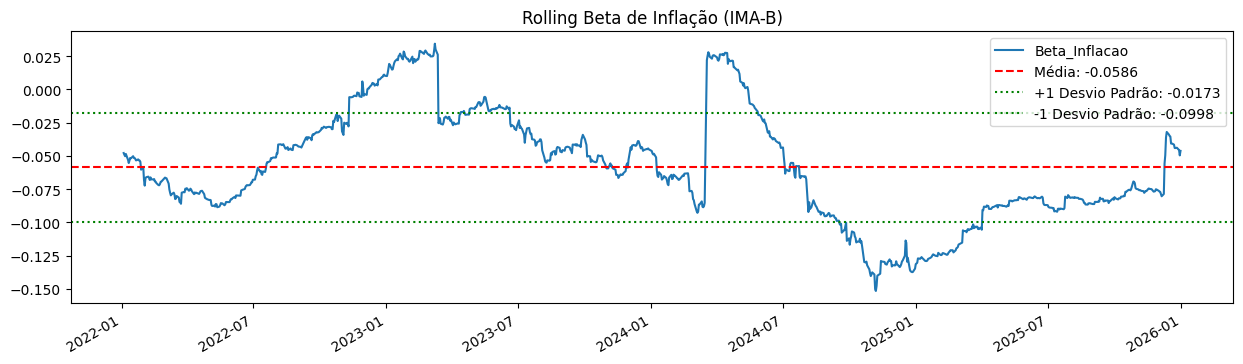

In [17]:
# Calcula a média do beta de inflação deslizante.
mean_beta = rolling_beta_ima.mean()
# Calcula o desvio padrão do beta de inflação deslizante.
std_beta = rolling_beta_ima.std()

# Plota o beta de inflação deslizante ao longo do tempo.
ax = rolling_beta_ima.plot(title='Rolling Beta de Inflação (IMA-B)',figsize=(15,4))
# Adiciona uma linha horizontal representando o valor médio do beta ao gráfico.
ax.axhline(mean_beta, color='red', linestyle='--', label=f'Média: {mean_beta:.4f}')
# Adiciona uma linha horizontal representando a média mais um desvio padrão ao gráfico.
ax.axhline(mean_beta + std_beta, color='green', linestyle=':', label=f'+1 Desvio Padrão: {mean_beta + std_beta:.4f}')
# Adiciona uma linha horizontal representando a média menos um desvio padrão ao gráfico.
ax.axhline(mean_beta - std_beta, color='green', linestyle=':', label=f'-1 Desvio Padrão: {mean_beta - std_beta:.4f}')


# Exibe a legenda para as linhas horizontais adicionadas.
ax.legend()
# Exibe o gráfico.
plt.show()